# Car price prediction(used cars) 🚗📊📉

## 1️⃣ Required Libraries

In [69]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 

from datetime import datetime

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

## 2️⃣ Read the Dataset

In [2]:
path = 'Dataset\car data.csv'
df = pd.read_csv(path)

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\moham\AppData\Local\Temp\ipykernel_30936\3081720036.py:1: SyntaxWarning: invalid escape sequence '\c'
  path = 'Dataset\car data.csv'


In [3]:
df.shape

(301, 9)

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## 3️⃣ Exploratory Data Analysis (EDA)

### Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### Description

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.642584,0.32,1.2,6.4,9.9,92.6
Driven_kms,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Car_Name,301,98,city,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,301.0,NaN,NaN,NaN,2013.627907,2.891554,2003.0,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,NaN,NaN,NaN,4.661296,5.082812,0.1,0.9,3.6,6.0,35.0
Present_Price,301.0,NaN,NaN,NaN,7.628472,8.642584,0.32,1.2,6.4,9.9,92.6
Driven_kms,301.0,NaN,NaN,NaN,36947.20598,38886.883882,500.0,15000.0,32000.0,48767.0,500000.0
Fuel_Type,301,3,Petrol,239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Selling_type,301,2,Dealer,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,301,2,Manual,261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner,301.0,NaN,NaN,NaN,0.043189,0.247915,0.0,0.0,0.0,0.0,3.0


### Check Target Column

In [8]:
df['Selling_Price']

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

### Check Missing values

In [9]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

### Check Duplication

In [10]:
df.duplicated().sum()

2

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

### Check Columns

In [13]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [14]:
df.drop(columns=['Car_Name'], inplace=True)

### Categorical Column

In [15]:
cat_col = df.select_dtypes('object').columns
cat_col

Index(['Fuel_Type', 'Selling_type', 'Transmission'], dtype='object')

In [16]:
for i in cat_col:
    print(df[i].value_counts())
    print('-' * 20)

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64
--------------------
Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64
--------------------
Transmission
Manual       260
Automatic     39
Name: count, dtype: int64
--------------------


C:\Users\moham\AppData\Local\Temp\ipykernel_30936\1892756891.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[i].isin(top5)], x=i, palette="Set2")


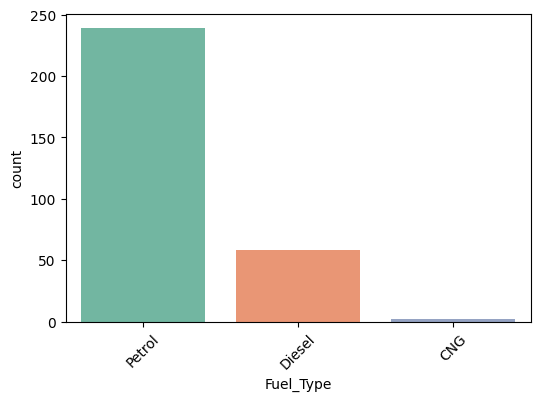

C:\Users\moham\AppData\Local\Temp\ipykernel_30936\1892756891.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=i, palette="Set1")


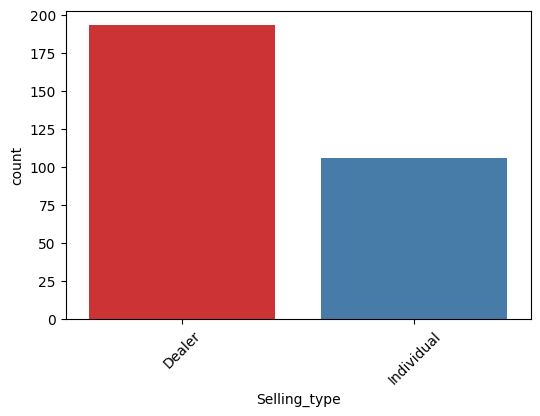

C:\Users\moham\AppData\Local\Temp\ipykernel_30936\1892756891.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=i, palette="Set1")


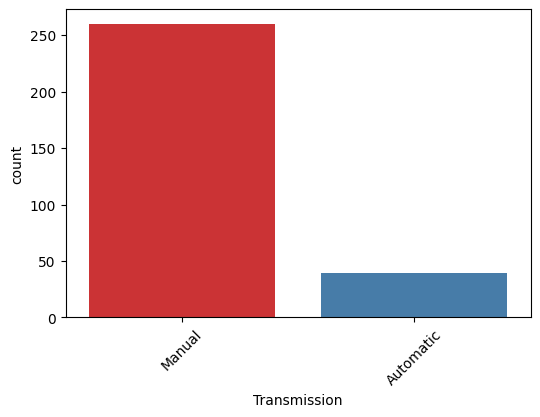

In [17]:
for i in cat_col:
    plt.figure(figsize=(6,4))
    
    if i == cat_col[0]:
        top5 = df[i].value_counts().head(5).index
        sns.countplot(data=df[df[i].isin(top5)], x=i, palette="Set2")
    else:
        sns.countplot(data=df, x=i, palette="Set1")
    
    plt.xticks(rotation=45)
    plt.show()

### Numeric Columsn 

In [18]:
num_col = df.select_dtypes(['int64' , 'float64']).columns
num_col

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner'], dtype='object')

#### Histogram + KDE

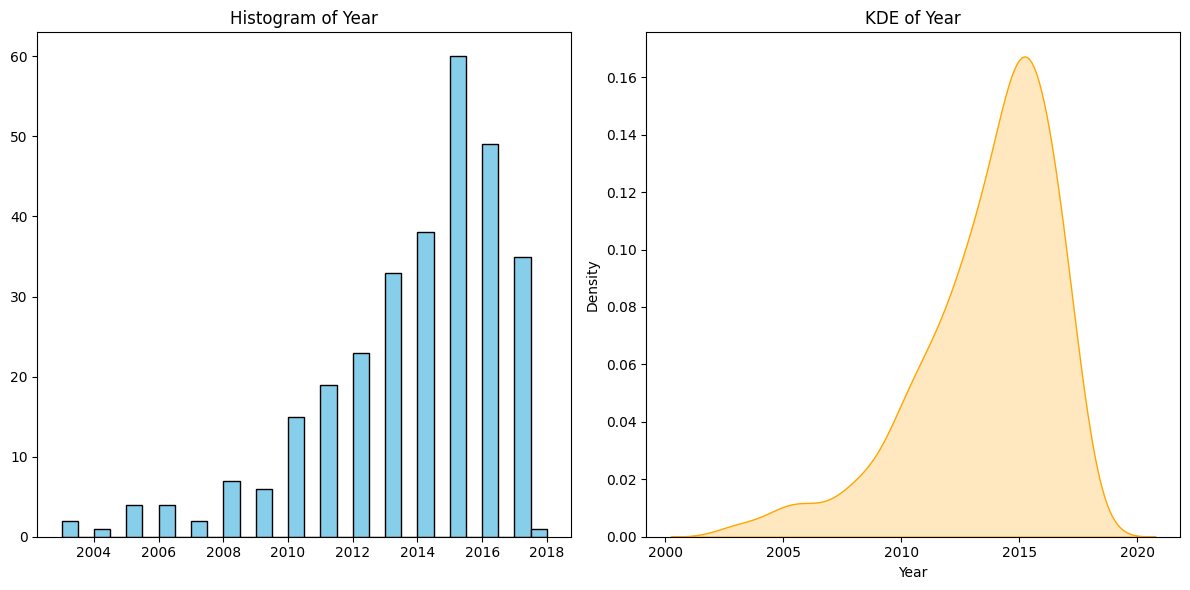

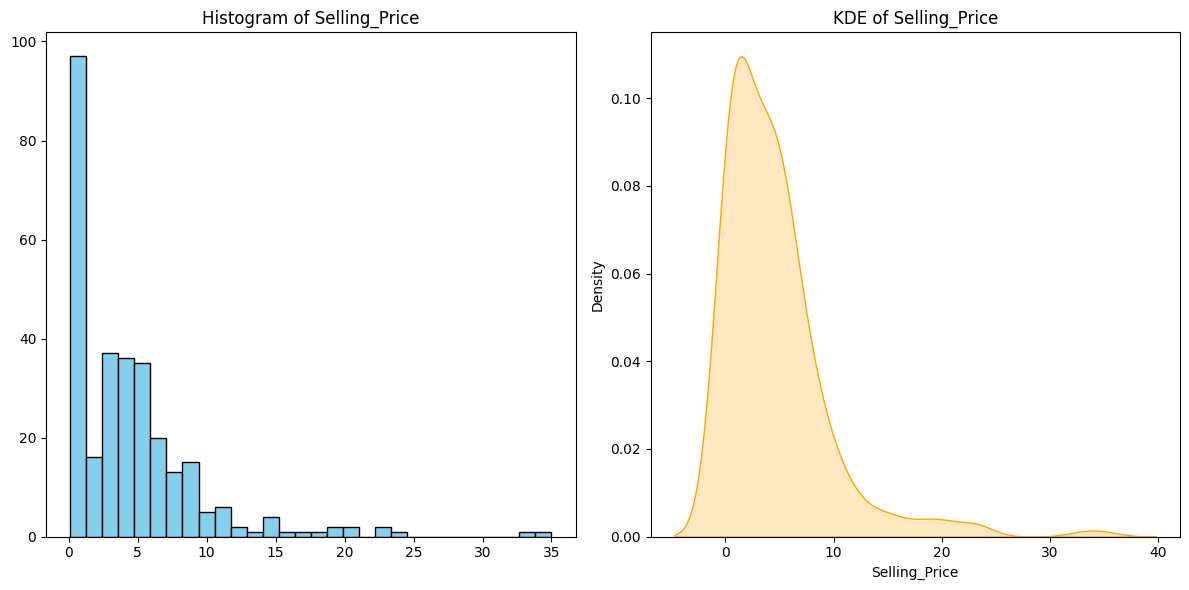

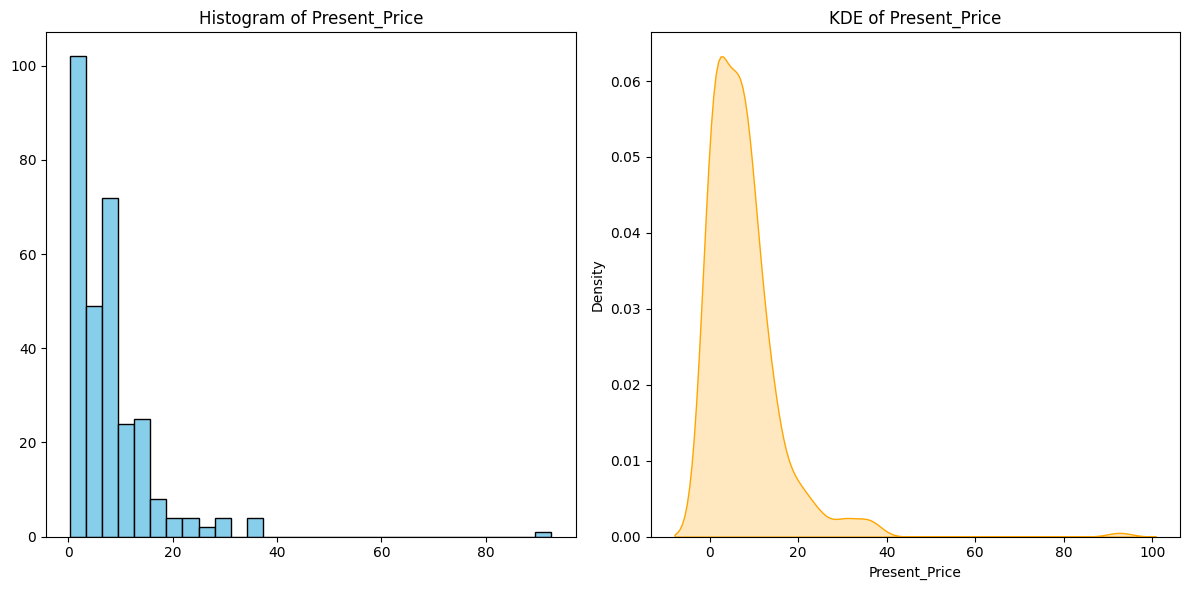

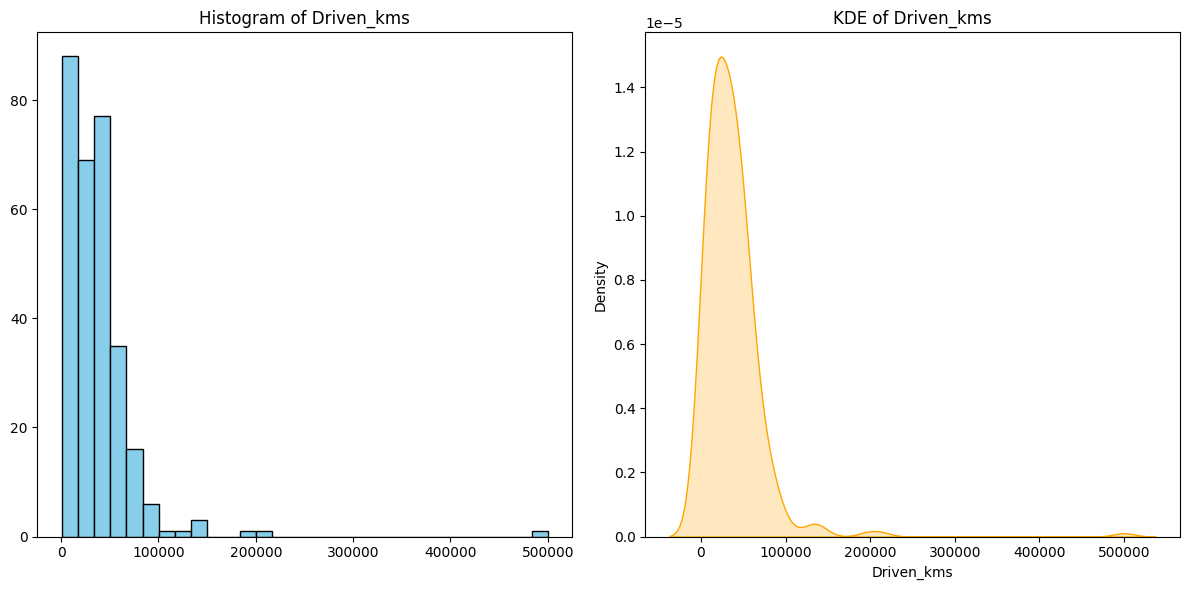

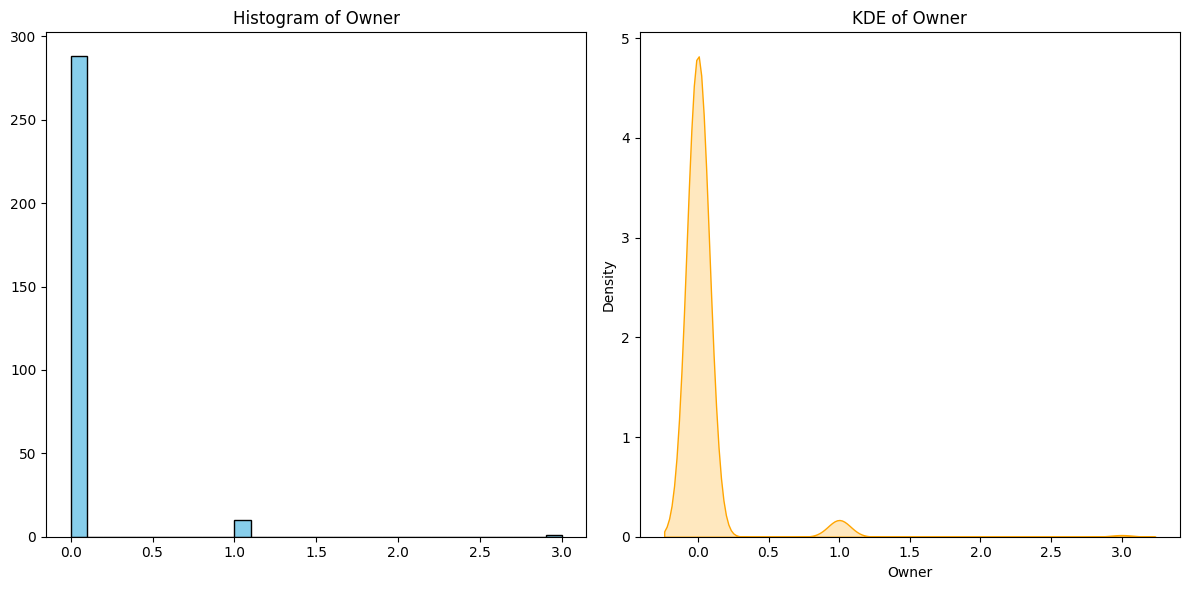

In [19]:
for i in num_col:
    plt.figure(figsize=(12,6))
    plt.subplot(1, 2, 1)  
    plt.hist(df[i], bins=30, color='skyblue' , edgecolor='black')
    plt.title(f'Histogram of {i}')

    plt.subplot(1, 2, 2)  
    sns.kdeplot(df[i], color='orange' , fill=True)
    plt.title(f'KDE of {i}')

    plt.tight_layout()
    plt.show()

#### Boxplot + Violinplot

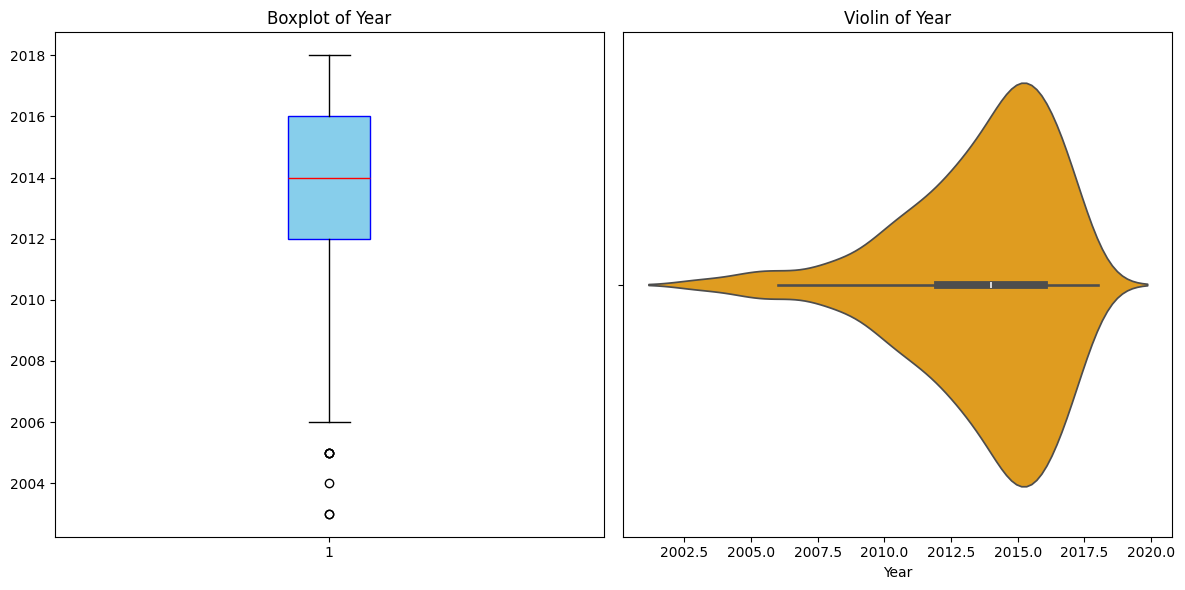

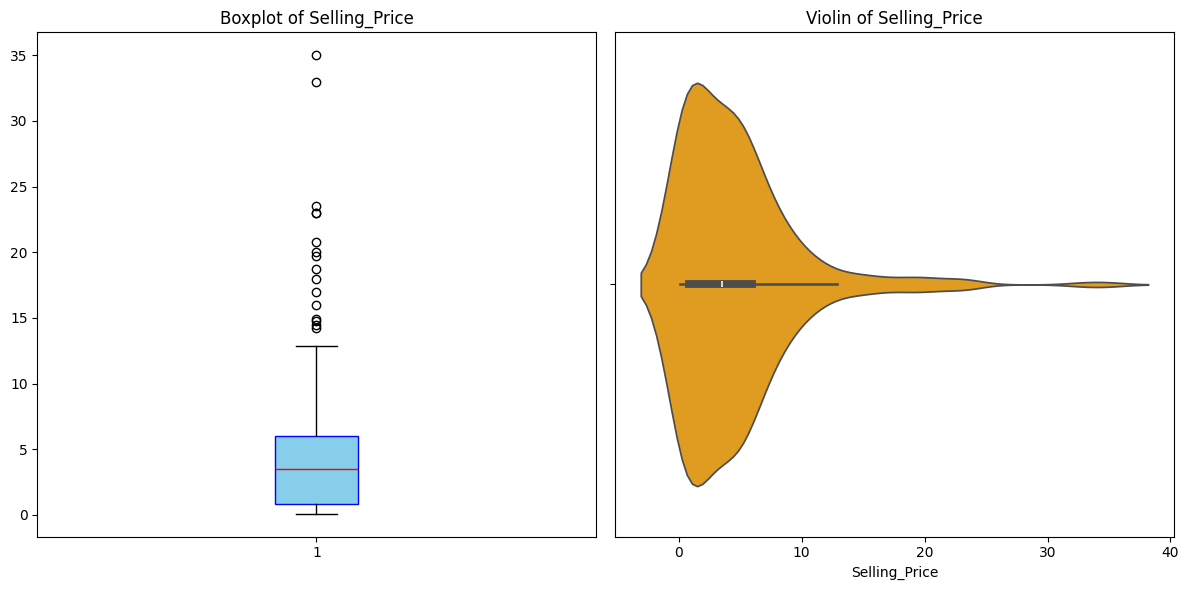

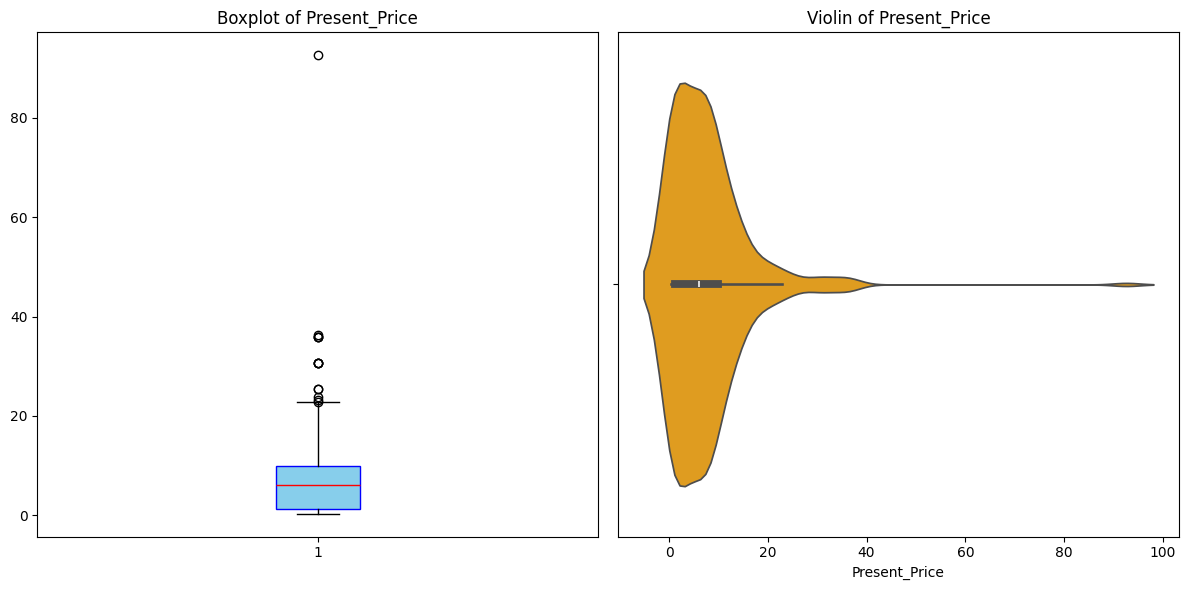

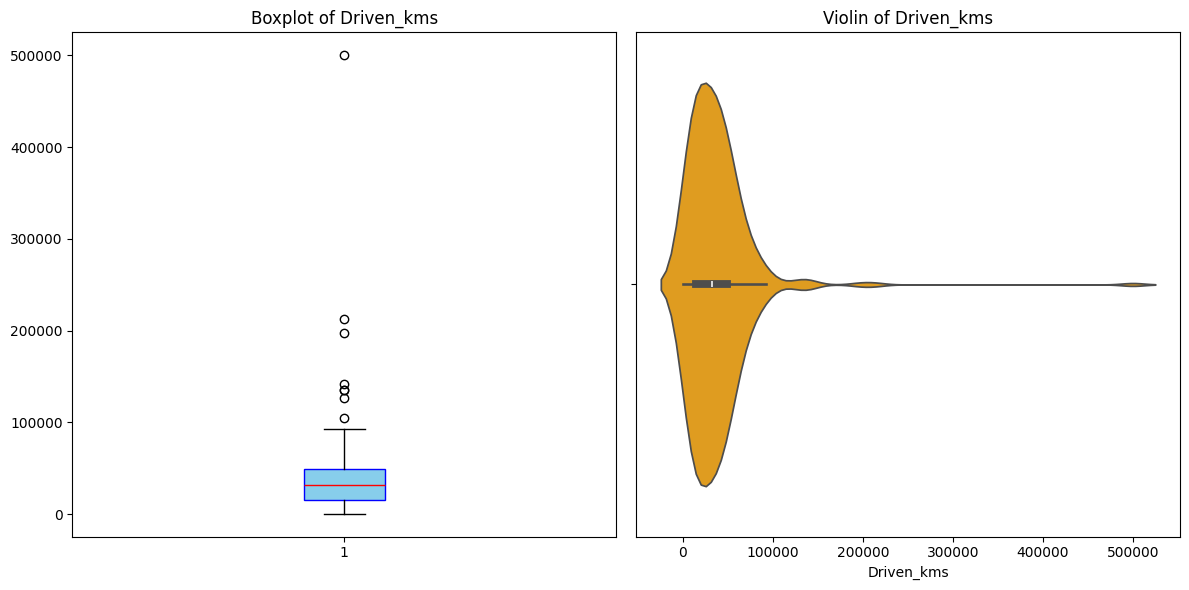

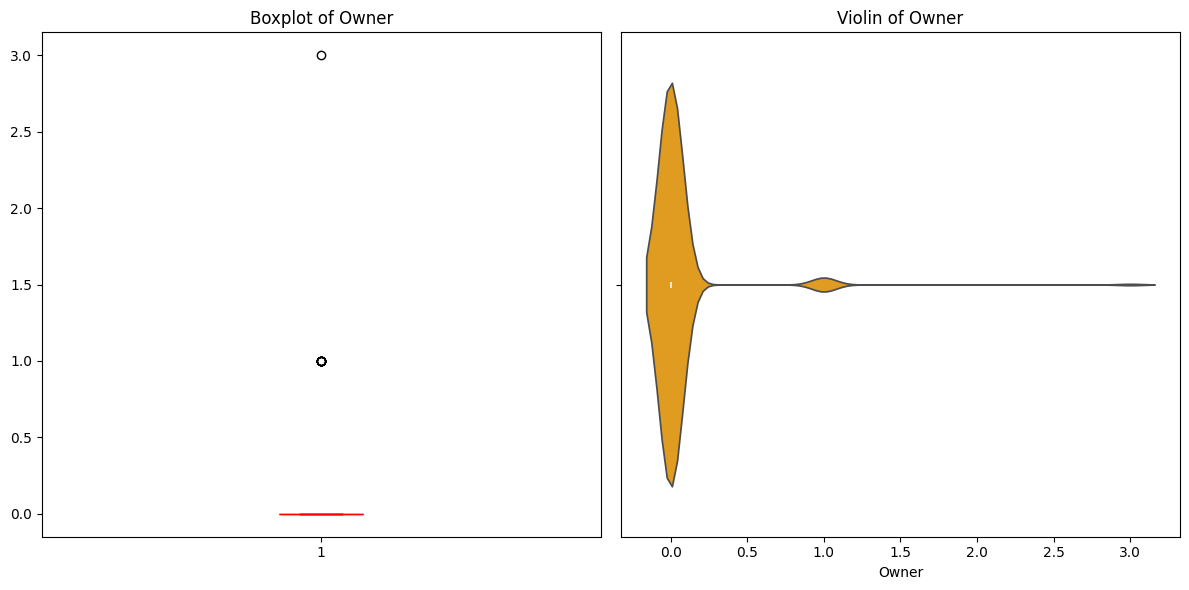

In [20]:
for i in num_col:
    plt.figure(figsize=(12,6))
    
    plt.subplot(1, 2, 1)  
    plt.boxplot(df[i], patch_artist=True, 
                boxprops=dict(facecolor='skyblue', color='blue'),
                medianprops=dict(color='red'))
    plt.title(f'Boxplot of {i}')

    plt.subplot(1, 2, 2)  
    sns.violinplot(x=df[i], color='orange')
    plt.title(f'Violin of {i}')

    plt.tight_layout()
    plt.show()

#### Fix Skewness in numeric columns

In [21]:
df['Selling_Price'] = np.log1p(df['Selling_Price'])
df['Present_Price'] = np.log1p(df['Present_Price'])

In [22]:
upper_limit = df['Driven_kms'].quantile(0.95) 
df['Driven_kms'] = np.where(df['Driven_kms'] > upper_limit, upper_limit, df['Driven_kms'])

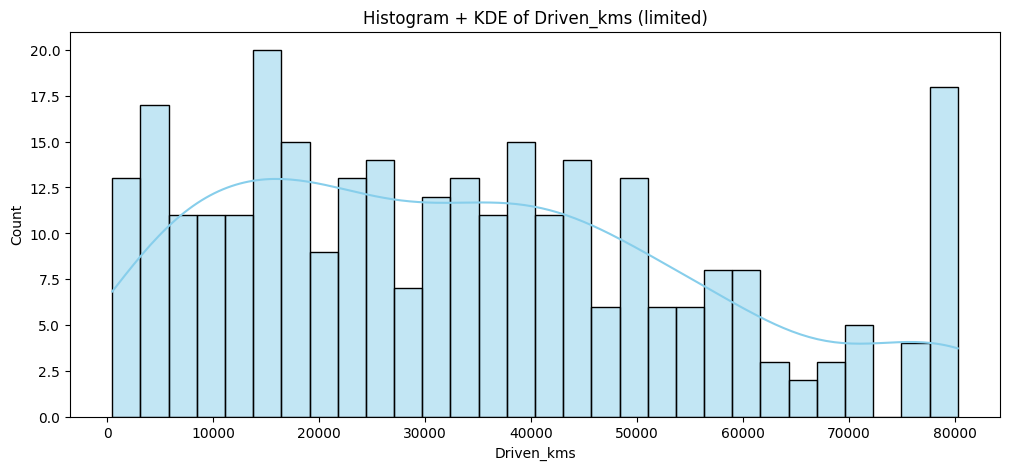

In [23]:
df_plot = df[df['Driven_kms'] < 500000]

plt.figure(figsize=(12,5))
sns.histplot(df_plot['Driven_kms'], kde=True, bins=30, color='skyblue')
plt.title('Histogram + KDE of Driven_kms (limited)')
plt.show()

#### Check Relations 

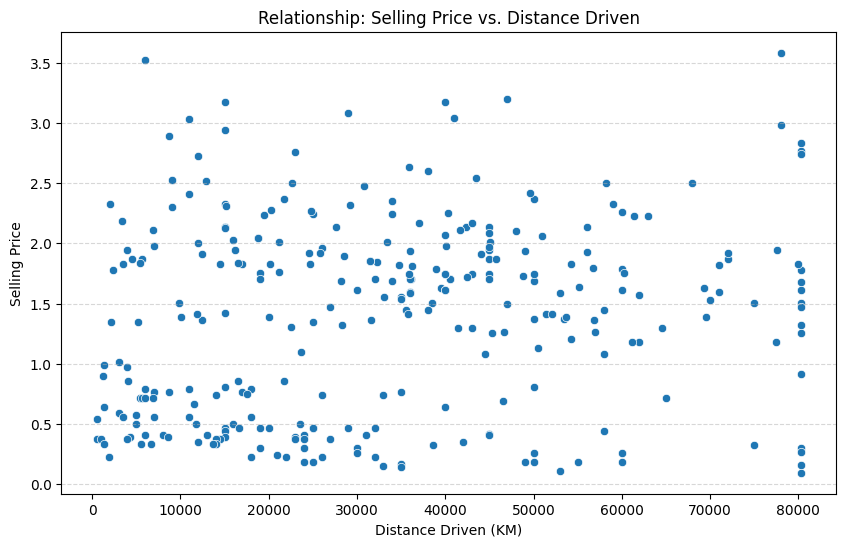

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['Driven_kms'],
    y=df['Selling_Price'],
)
plt.title('Relationship: Selling Price vs. Distance Driven')
plt.xlabel('Distance Driven (KM)')
plt.ylabel('Selling Price')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#### Correlation Matrix

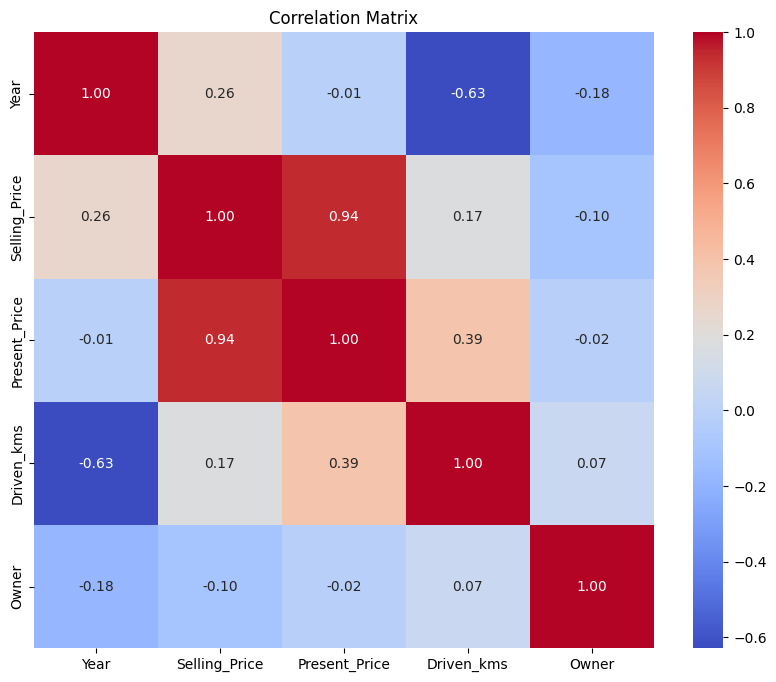

In [25]:
corr = df[num_col].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## 4️⃣ Feature Engineering

#### Feature Age of Car

In [26]:
now = datetime.now().year
now

2026

In [27]:
df['Age'] = now - df['Year']
df['Age']

0      12
1      13
2       9
3      15
4      12
       ..
296    10
297    11
298    17
299     9
300    10
Name: Age, Length: 299, dtype: int64

In [51]:
df.drop(columns=['Year'] , inplace=True)

#### Check Relations

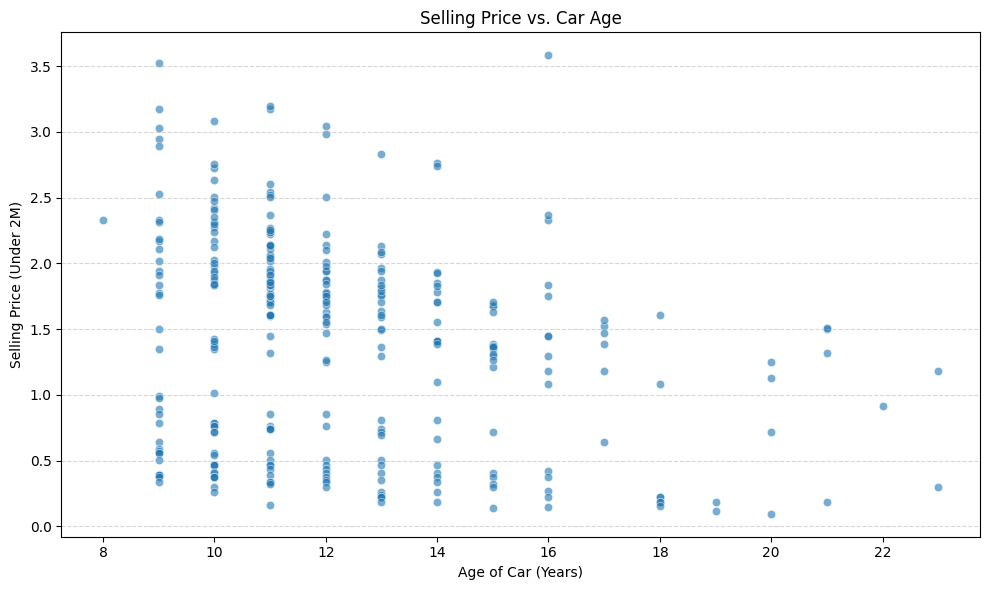

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['Age'],
    y=df['Selling_Price'],
    alpha=0.6,
)

plt.title('Selling Price vs. Car Age')
plt.xlabel('Age of Car (Years)')
plt.ylabel('Selling Price (Under 2M)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Is automatic transmission in diesel more expensive than automatic transmission in gasoline?

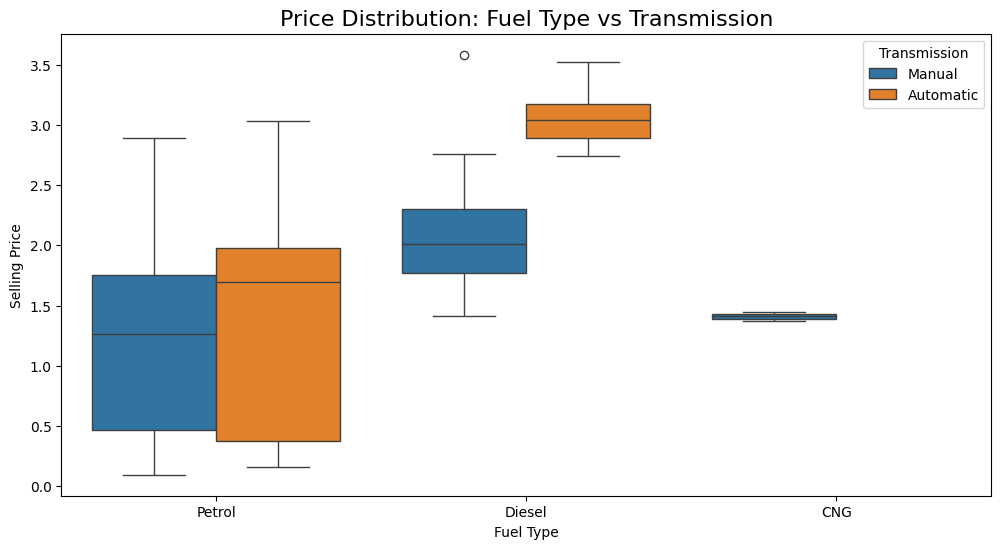

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', hue='Transmission', data=df)
plt.title('Price Distribution: Fuel Type vs Transmission', fontsize=16)
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.legend(title='Transmission')
plt.show()

## 5️⃣ Data Transformation

In [34]:
cat_col

Index(['Fuel_Type', 'Selling_type', 'Transmission'], dtype='object')

In [39]:
le = LabelEncoder()

for i in cat_col:
    df[i] = le.fit_transform(df[i])

In [40]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,2014,1.470176,1.885553,27000.0,2,0,1,0,12
1,2013,1.749200,2.355178,43000.0,1,0,1,0,13
2,2017,2.110213,2.384165,6900.0,2,0,1,0,9
3,2011,1.348073,1.638997,5200.0,2,0,1,0,15
4,2014,1.722767,2.063058,42450.0,1,0,1,0,12


## 6️⃣ Split Data into Features and Target

In [43]:
X = df.drop(columns=['Selling_Price'])
y = df['Selling_Price']

In [44]:
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,2014,1.885553,27000.0,2,0,1,0,12
1,2013,2.355178,43000.0,1,0,1,0,13
2,2017,2.384165,6900.0,2,0,1,0,9
3,2011,1.638997,5200.0,2,0,1,0,15
4,2014,2.063058,42450.0,1,0,1,0,12
...,...,...,...,...,...,...,...,...
296,2016,2.533697,33988.0,1,0,1,0,10
297,2015,1.931521,60000.0,2,0,1,0,11
298,2009,2.484907,80300.0,2,0,1,0,17
299,2017,2.602690,9000.0,1,0,1,0,9


## 7️⃣ Split Data into Train and Test Sets

In [58]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

In [59]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

## 8️⃣ Modeling

### Linear Regression 

In [ ]:
linear_model = LinearRegression()

In [78]:
all_scores = {}

scores = cross_validate(
    linear_model,
    X_train_scaled,
    y_train,
    cv=5,
    scoring={
        'rmse': 'neg_root_mean_squared_error',
        'r2': 'r2'
    }
)
rmse_mean = -scores['test_rmse'].mean()
r2_mean   = scores['test_r2'].mean()
all_scores['Linear regression'] = [rmse_mean , r2_mean]

print('Model Linear regression')
print(f"RMSE (CV): {rmse_mean:.3f}")
print(f"R² (CV): {r2_mean:.3f}")

Model Linear regression
RMSE (CV): 0.137
R² (CV): 0.970


### SVM

In [72]:
svm_model = SVR()

In [79]:
scores = cross_validate(
    svm_model,
    X_train_scaled,
    y_train,
    cv=5,
    scoring={
        'rmse': 'neg_root_mean_squared_error',
        'r2': 'r2'
    }
)
rmse_mean = -scores['test_rmse'].mean()
r2_mean   = scores['test_r2'].mean()
all_scores['SVM'] = [rmse_mean , r2_mean]

print('SVM')
print(f"RMSE (CV): {rmse_mean:.3f}")
print(f"R² (CV): {r2_mean:.3f}")

SVM
RMSE (CV): 0.184
R² (CV): 0.944


### Decision Tree

In [74]:
tree_model = DecisionTreeRegressor()

In [80]:
scores = cross_validate(
    tree_model,
    X_train_scaled,
    y_train,
    cv=5,
    scoring={
        'rmse': 'neg_root_mean_squared_error',
        'r2': 'r2'
    }
)
rmse_mean = -scores['test_rmse'].mean()
r2_mean   = scores['test_r2'].mean()
all_scores['Decision Tree'] = [rmse_mean , r2_mean]

print('Model Decision Tree')
print(f"RMSE (CV): {rmse_mean:.3f}")
print(f"R² (CV): {r2_mean:.3f}")

Model Decision Tree
RMSE (CV): 0.157
R² (CV): 0.958


### Evaluation

In [81]:
all_scores

{'Linear regression': [0.136536433528298, 0.970209943879893],
 'SVM': [0.1838379407216473, 0.9439607672571784],
 'Decision Tree': [0.1566796258084781, 0.9584463057465598]}

In [82]:
models = list(all_scores.keys())
rmse = [all_scores[m][0] for m in models]
r2   = [all_scores[m][1] for m in models]

x = np.arange(len(models))
width = 0.35

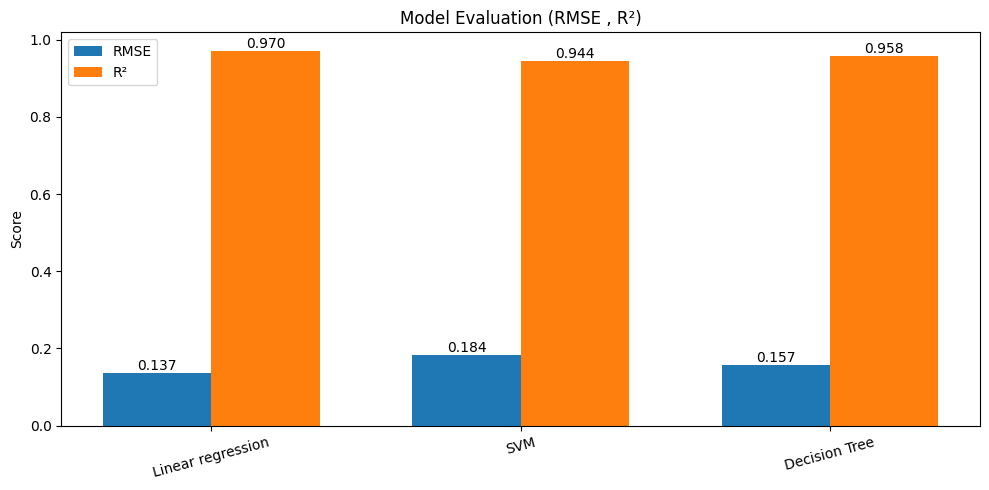

In [85]:
plt.figure(figsize=(10,5))

bars1 = plt.bar(x - width/2, rmse, width, label='RMSE')
bars2 = plt.bar(x + width/2, r2, width, label='R²')

plt.xticks(x, models, rotation=15)
plt.ylabel('Score')
plt.title('Model Evaluation (RMSE , R²)')
plt.legend()

for bar in bars1:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{bar.get_height():.3f}",
        ha='center', va='bottom'
    )

for bar in bars2:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{bar.get_height():.3f}",
        ha='center', va='bottom'
    )

plt.tight_layout()
plt.show()


## Thank You🎀🫶🏻